In [2]:
!pip install kagglehub

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

path = kagglehub.dataset_download("tboyle10/medicaltranscriptions")
print("Dataset path:", path)
print(os.listdir(path))

100%|██████████| 4.85M/4.85M [00:00<00:00, 83.4MB/s]

Extracting files...


Dataset path: /root/.cache/kagglehub/datasets/tboyle10/medicaltranscriptions/versions/1
['mtsamples.csv']


In [3]:
csv_path = os.path.join(path, "mtsamples.csv")
df = pd.read_csv(csv_path)

df.head()
df.info()
df['medical_specialty'].value_counts().head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


,count
medical_specialty,
Surgery,1103
Consult - History and Phy.,516
Cardiovascular / Pulmonary,372
Orthopedic,355
Radiology,273


In [5]:
df = df[['transcription', 'medical_specialty']]
df.dropna(inplace=True)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X = vectorizer.fit_transform(df['transcription'])
y = df['medical_specialty']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.2676056338028169
                                precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         2
                       Autopsy       0.00      0.00      0.00         1
                    Bariatrics       0.00      0.00      0.00         2
    Cardiovascular / Pulmonary       0.27      0.27      0.27        79
                  Chiropractic       0.00      0.00      0.00         2
    Consult - History and Phy.       0.27      0.52      0.36       111
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         7
                     Dentistry       0.00      0.00      0.00         8
                   Dermatology       0.00      0.00      0.00         2
          Diets and Nutritions       0.00      0.00      0.00         1
             Discharge Summary       0.35      0.26      0.30        23
          ENT - Otolaryngology       0.00      0.00      0.00        32
        Emergency Room Reports    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


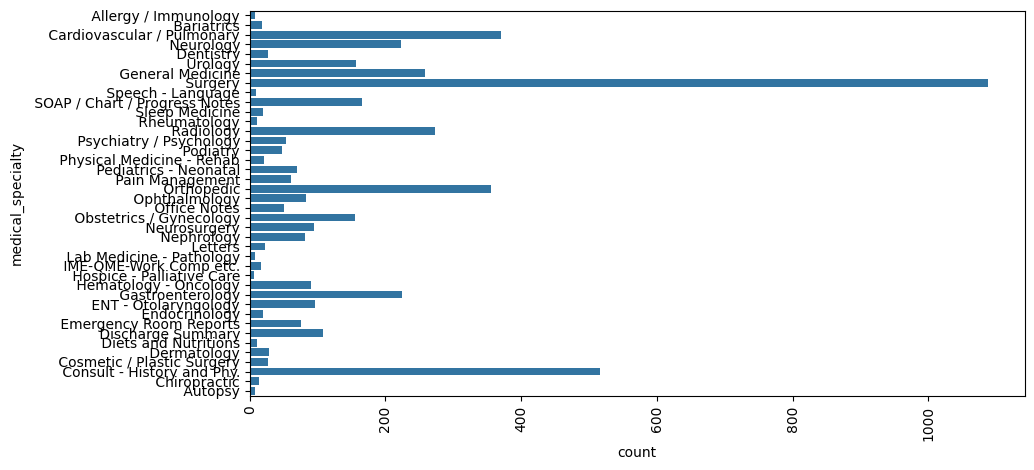

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['medical_specialty'])
plt.xticks(rotation=90)
plt.show()